# Listing 5.5 - Using one-dimensional logistic regression

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.math as math

np.random.seed(45)

In [2]:
DTYPE = tf.float32
learning_rate = 0.01
training_epochs = 1000
momentum = 0.0

In [3]:
@tf.function
def sigmoid(x):
    return tf.convert_to_tensor(1. / (1. + np.exp(-x)))

In [4]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

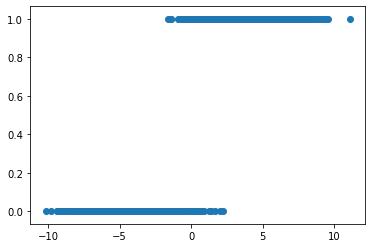

In [5]:
plt.scatter(xs, ys)

In [6]:
X = tf.constant(xs, dtype=DTYPE, name='x')
Y = tf.constant(ys, dtype=DTYPE, name='y')
w = tf.Variable([0., 0.], name='parameter', dtype=DTYPE)
w

<tf.Variable 'parameter:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [7]:
@tf.function
def y_model():
    return tf.sigmoid(w[1] * X + w[0])

In [8]:
@tf.function
def cost():
    return math.reduce_mean(
        -Y * math.log(y_model())
        -(1 - Y) * math.log(1 - y_model())
    )

In [9]:
train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

In [10]:
prev_err = 0
for epoch in range(training_epochs):
    train_op.minimize(cost, w)
    err = cost()
#     if math.abs(prev_err - err) < 0.0001:
#         break
    prev_err = err

In [11]:
w_val = w.numpy()
w_val

array([0.01858419, 1.3179771 ], dtype=float32)

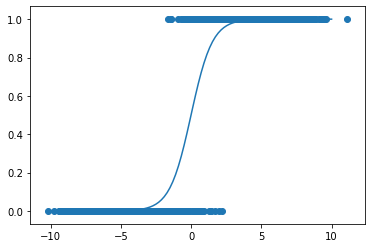

In [12]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, math.sigmoid(all_xs * w_val[1] + w_val[0]))
plt.scatter(xs, ys)
plt.show()